In [22]:
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [23]:
%cd Thesis/eyediease

/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from typing import Tuple, List
from pathlib import Path
import random
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [25]:
main_path = Path(os.getcwd() + '/data/raw/FGADR/Seg-set')

In [26]:
list(a.name for a in list(main_path.glob('*')))

['HardExudate_Masks',
 '.DS_Store',
 'SoftExudate_Masks',
 'Neovascularization_Masks',
 'Microaneurysms_Masks',
 'Hemohedge_Masks',
 'IRMA_Masks',
 'Original_Images',
 'DR_Seg_Grading_Label.csv']

In [27]:
sub_name = list(a.name for a in list(main_path.glob('*')))

In [28]:
sub_dirs = []

for name in sub_name:
  if len(list((main_path / Path(name)).glob('*')))>0:
    sub_dirs.append(main_path / Path(name))

In [29]:
sub_dirs

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/HardExudate_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/SoftExudate_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/Neovascularization_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/Microaneurysms_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/Hemohedge_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/IRMA_Masks'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Thesis/eyediease/data/raw/FGADR/Seg-set/Original_Images')]

In [30]:
EX_len = len(list(sub_dirs[0].glob('*.*')))
SE_len = len(list(sub_dirs[1].glob('*.*')))
NEO_len = len(list(sub_dirs[2].glob('*.*')))
MA_len = len(list(sub_dirs[3].glob('*.*')))
HE_len = len(list(sub_dirs[4].glob('*.*')))
IRMA_len = len(list(sub_dirs[5].glob('*.*')))
Ori_len = len(list(sub_dirs[6].glob('*.*')))
print('EX', EX_len)
print('HE', HE_len)
print('MA', MA_len)
print('SE', SE_len)
print('IRMA', IRMA_len)
print('NEO', NEO_len)
print('Ori', Ori_len)

EX 1842
HE 1842
MA 1842
SE 1842
IRMA 159
NEO 49
Ori 1842


In [11]:
finalimg_size = 0
for img in list(sub_dirs[6].glob('*.*')):
  img_size = Image.open(img).size
  if finalimg_size == 0:
    finalimg_size = img_size
  elif finalimg_size != img_size:
    print(finalimg_size)
    print(img_size)
    print('Inconsistence')
    break
  else:
    continue

print(finalimg_size)

(1280, 1280)


In [ ]:
img_types = []
for img in list(sub_dirs[6].glob('*.*')):
  filename = img.name
  img_type = filename.split('.')[0].split('_')[1]
  img_types.append(img_type)

from collections import Counter
result= Counter(img_types)
print(result)

Counter({'1': 1000, '3': 588, '2': 254})


In [77]:
SEED=1999
def seed(SEED):
  np.random.seed(SEED)
  random.seed(SEED)

seed(SEED)

## Original Images

In [40]:
choose_img = np.random.choice(Ori_len, 1)[0]

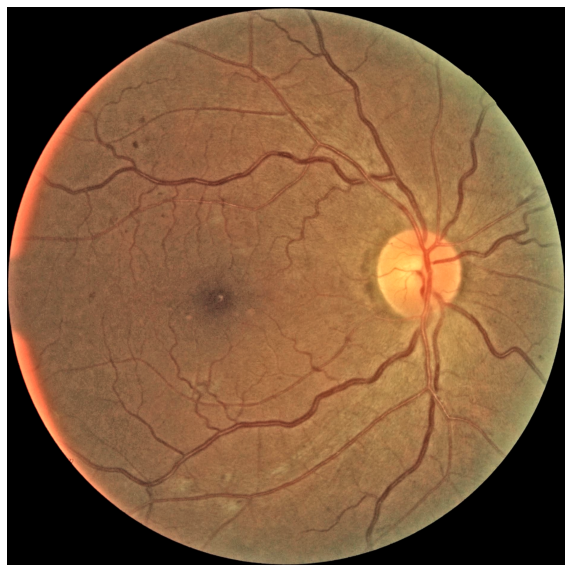

In [42]:
origin_img = Image.open(str(list(sub_dirs[6].glob('*.*'))[choose_img]))
plt.figure(figsize=(10, 20))
plt.imshow(origin_img)
plt.axis('off')
plt.show()

In [12]:
choose_imgs = np.random.choice(list(sub_dirs[6].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## EX

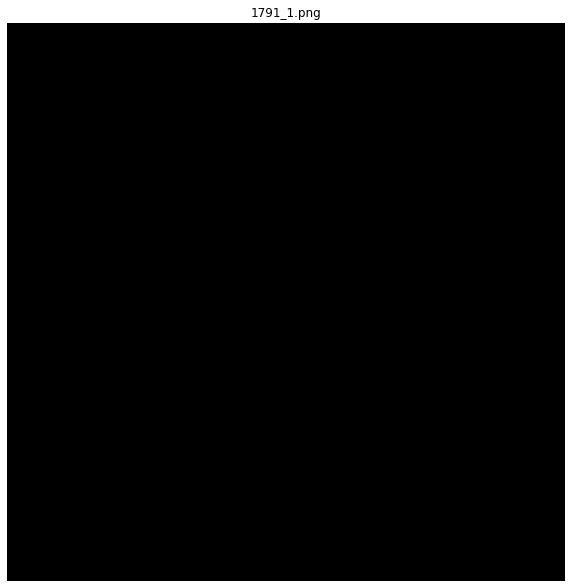

Unique value: [0]


In [ ]:
filename = list(sub_dirs[0].glob('*.*'))[choose_img]
img = Image.open(str(filename))
plt.figure(figsize=(10, 20))
plt.imshow(img, cmap='gray')
plt.title(filename.name)
plt.axis('off')
plt.show()

print(f'Unique value: {np.unique(img)}')

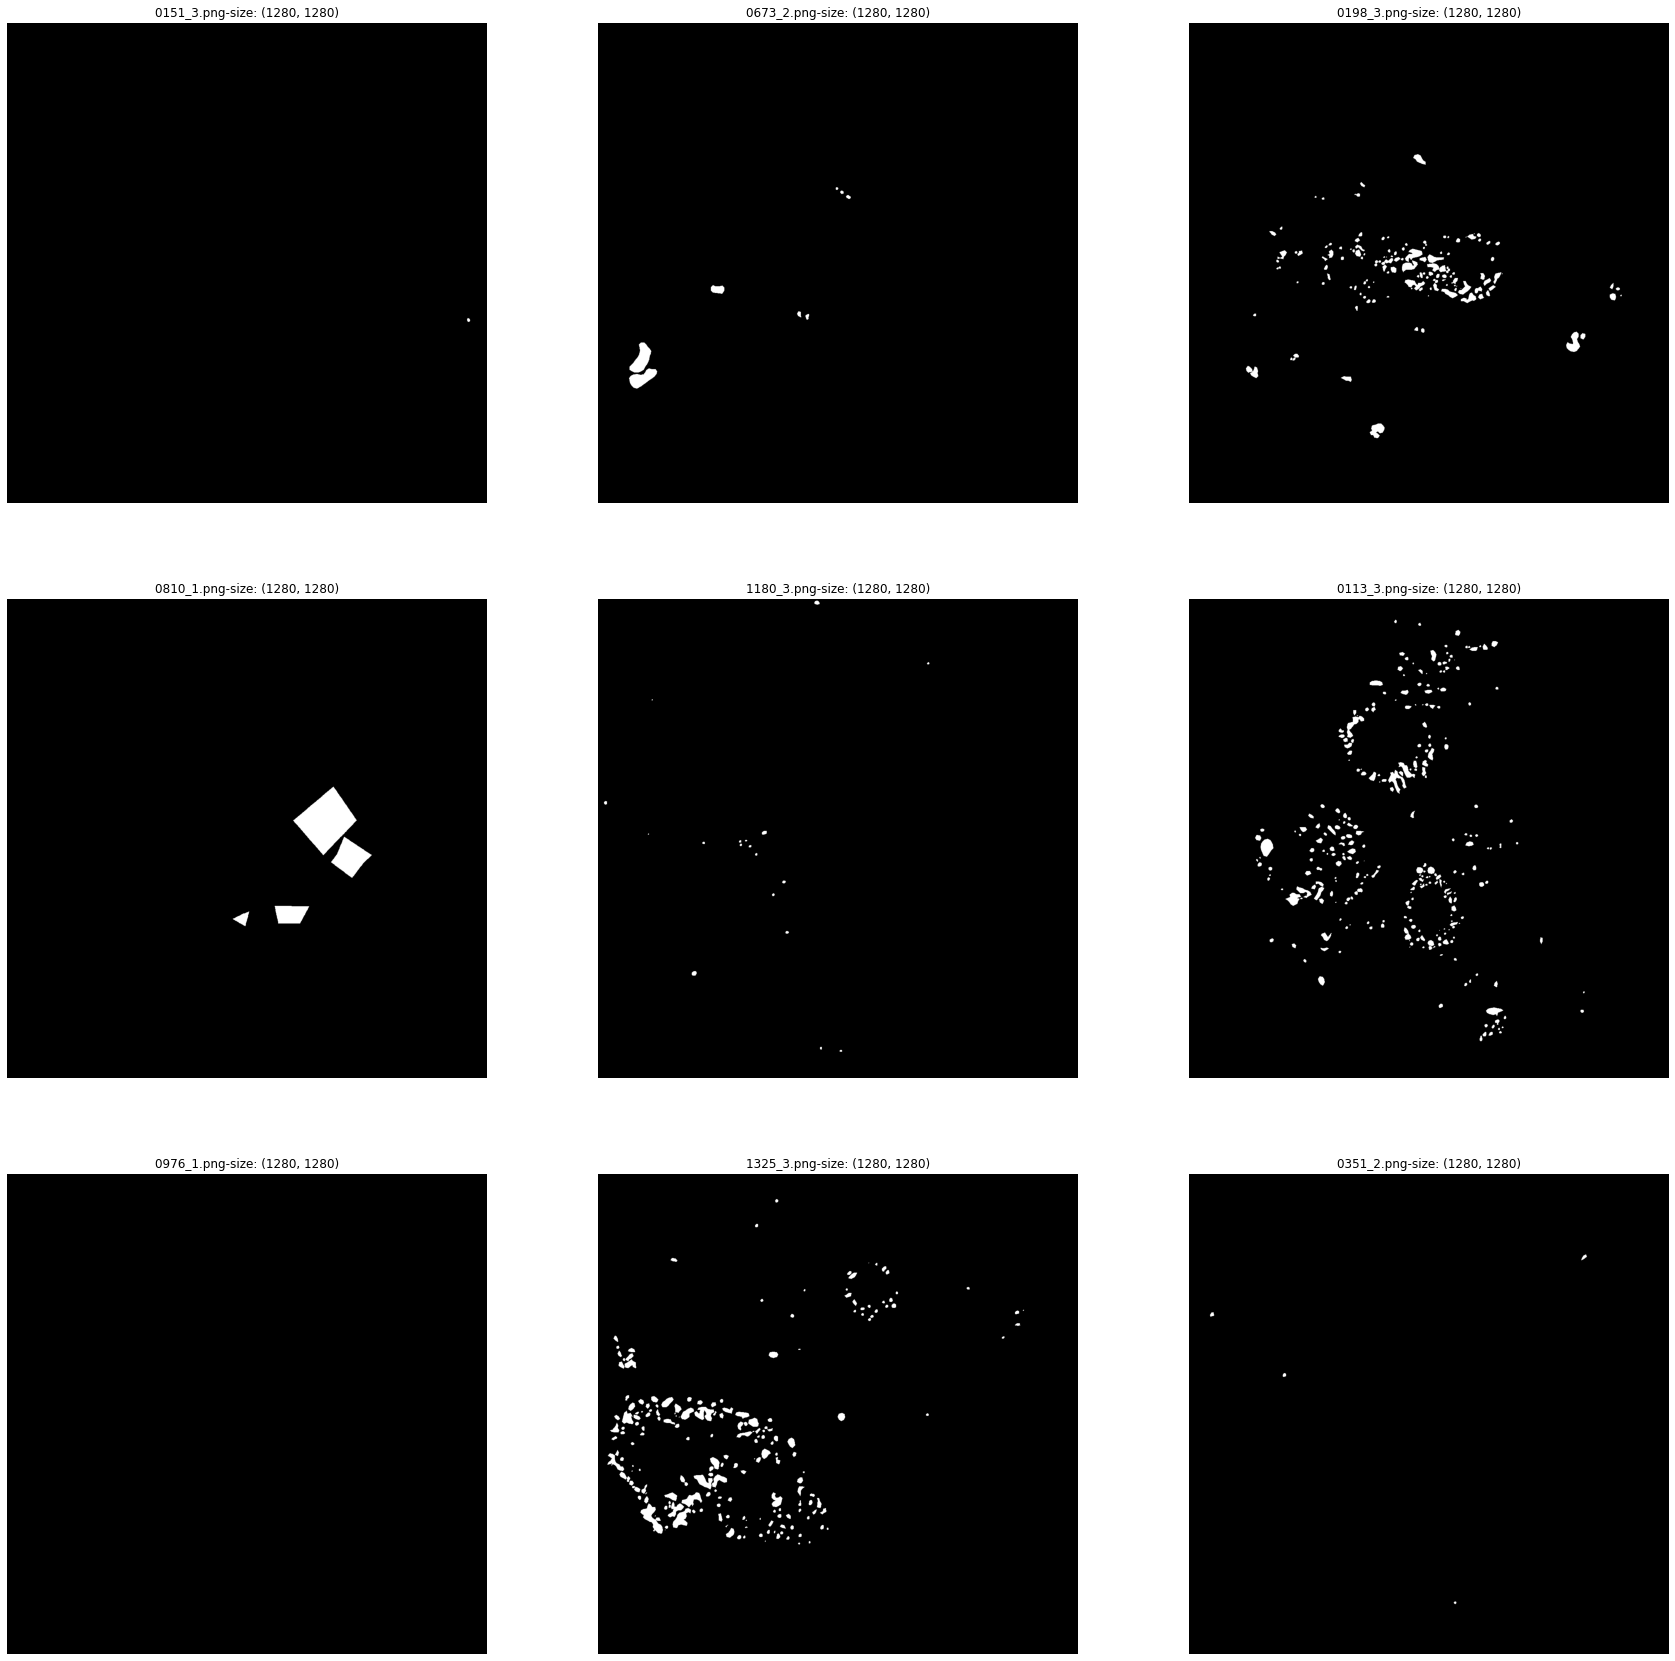

In [16]:
choose_imgs = np.random.choice(list(sub_dirs[0].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

## HE

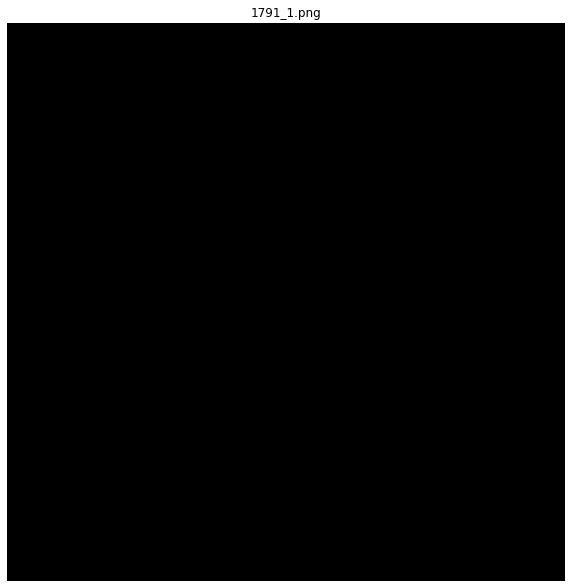

Unique value [0]


In [ ]:
filename = list(sub_dirs[4].glob('*.*'))[choose_img]
img = Image.open(str(filename))
plt.figure(figsize=(10, 20))
plt.imshow(img, cmap='gray')
plt.title(filename.name)
plt.axis('off')
plt.show()

print(f'Unique value {np.unique(img)}')

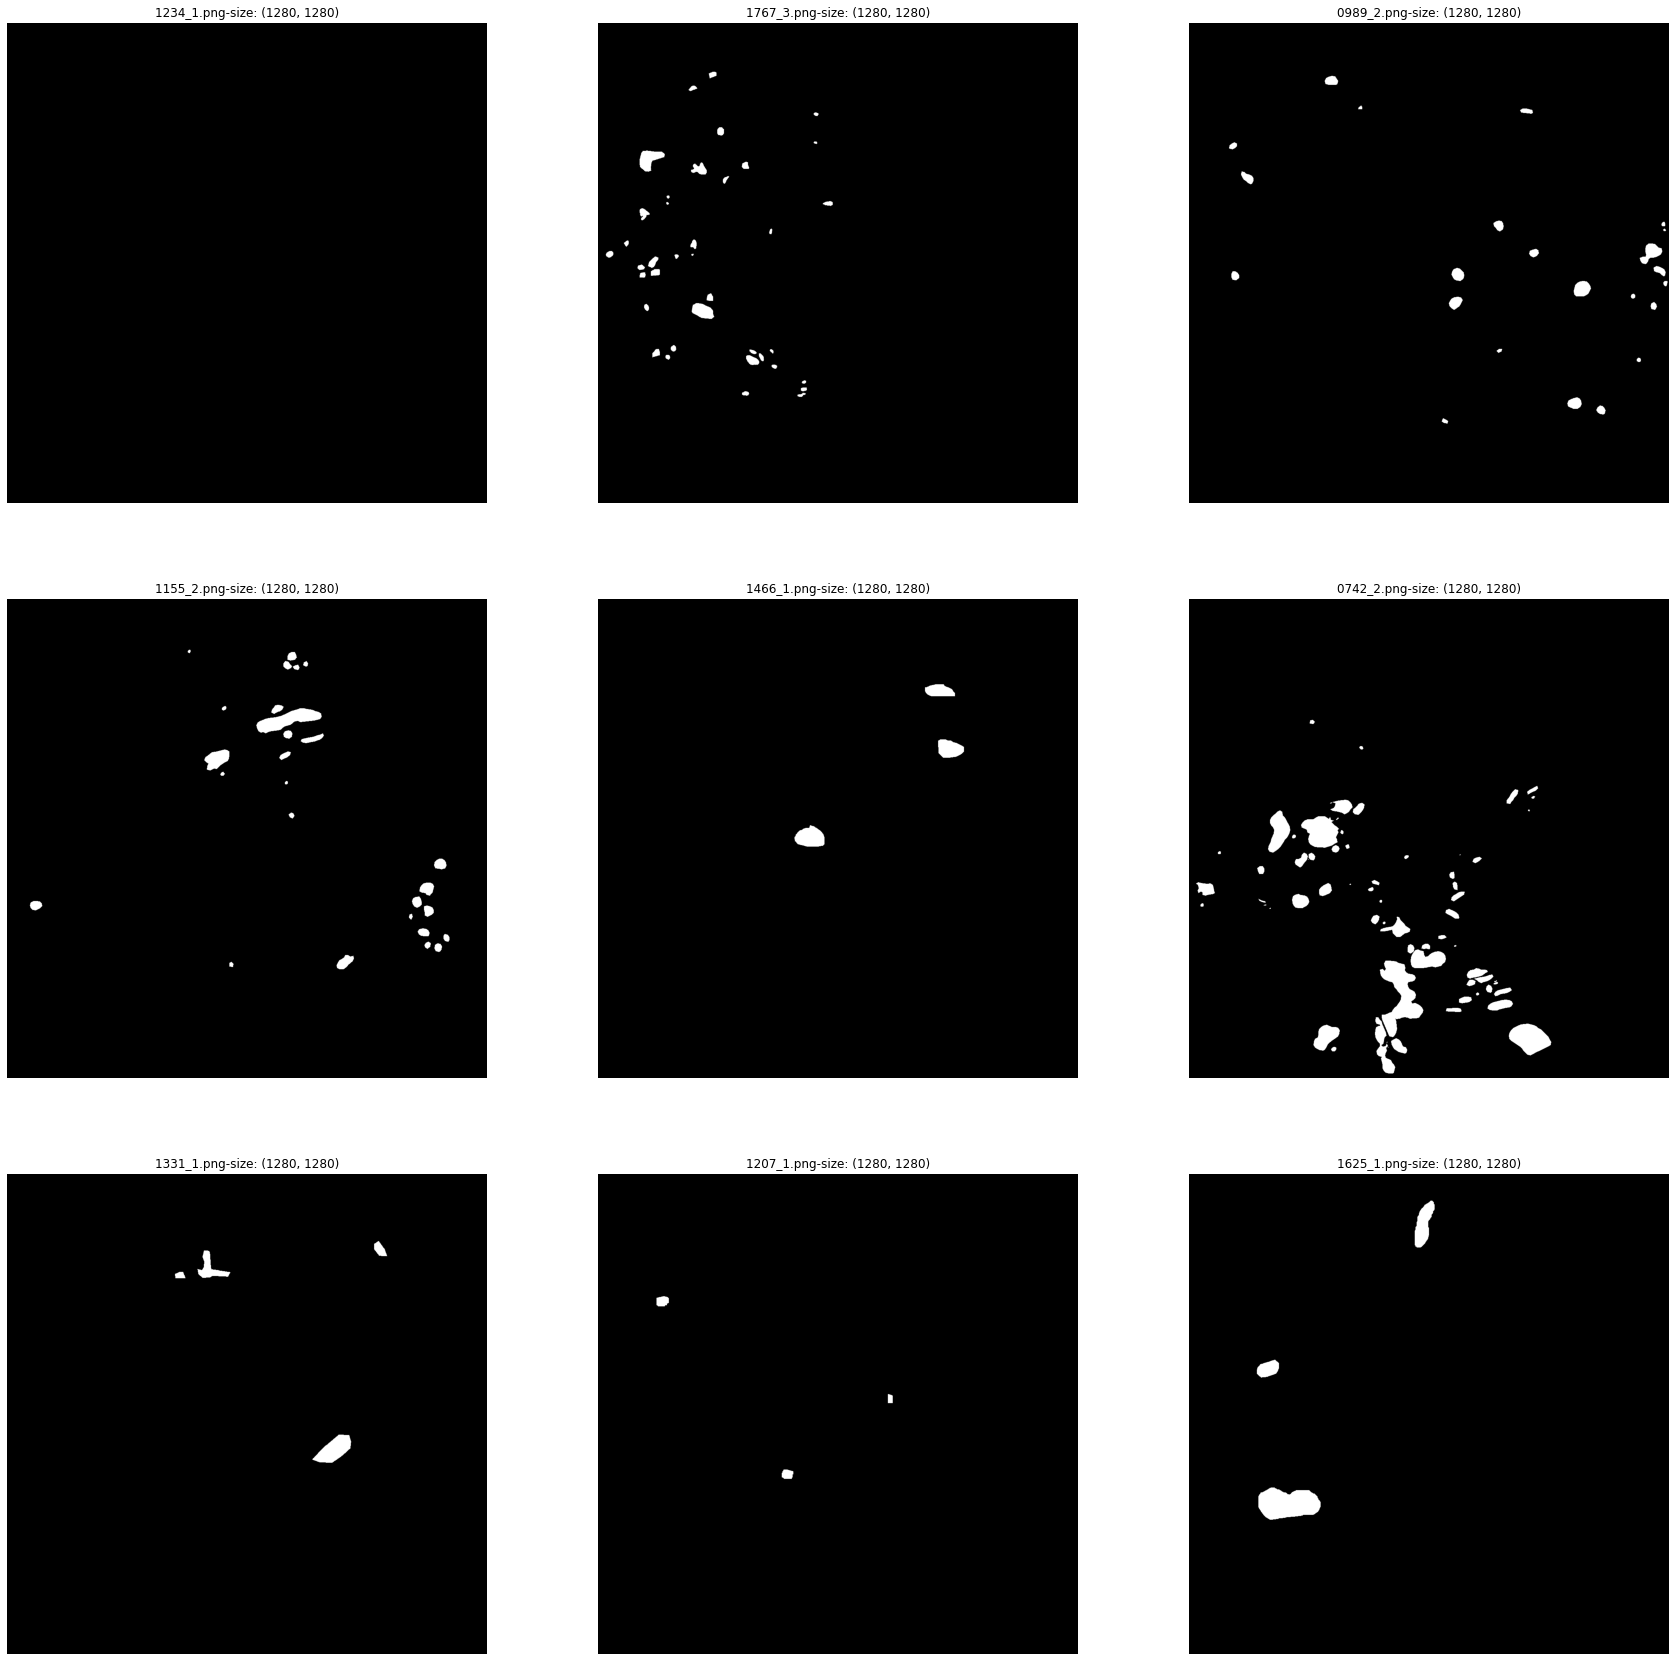

In [18]:
choose_imgs = np.random.choice(list(sub_dirs[4].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

## MA

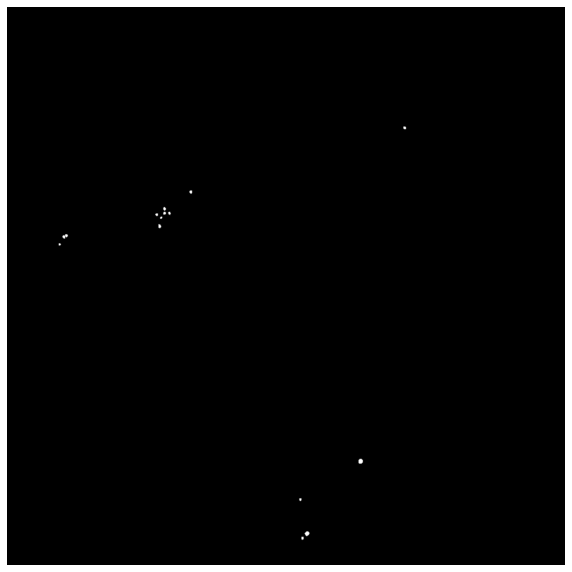

In [ ]:
img = Image.open(str(list(sub_dirs[3].glob('*.*'))[choose_img]))
plt.figure(figsize=(10, 20))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

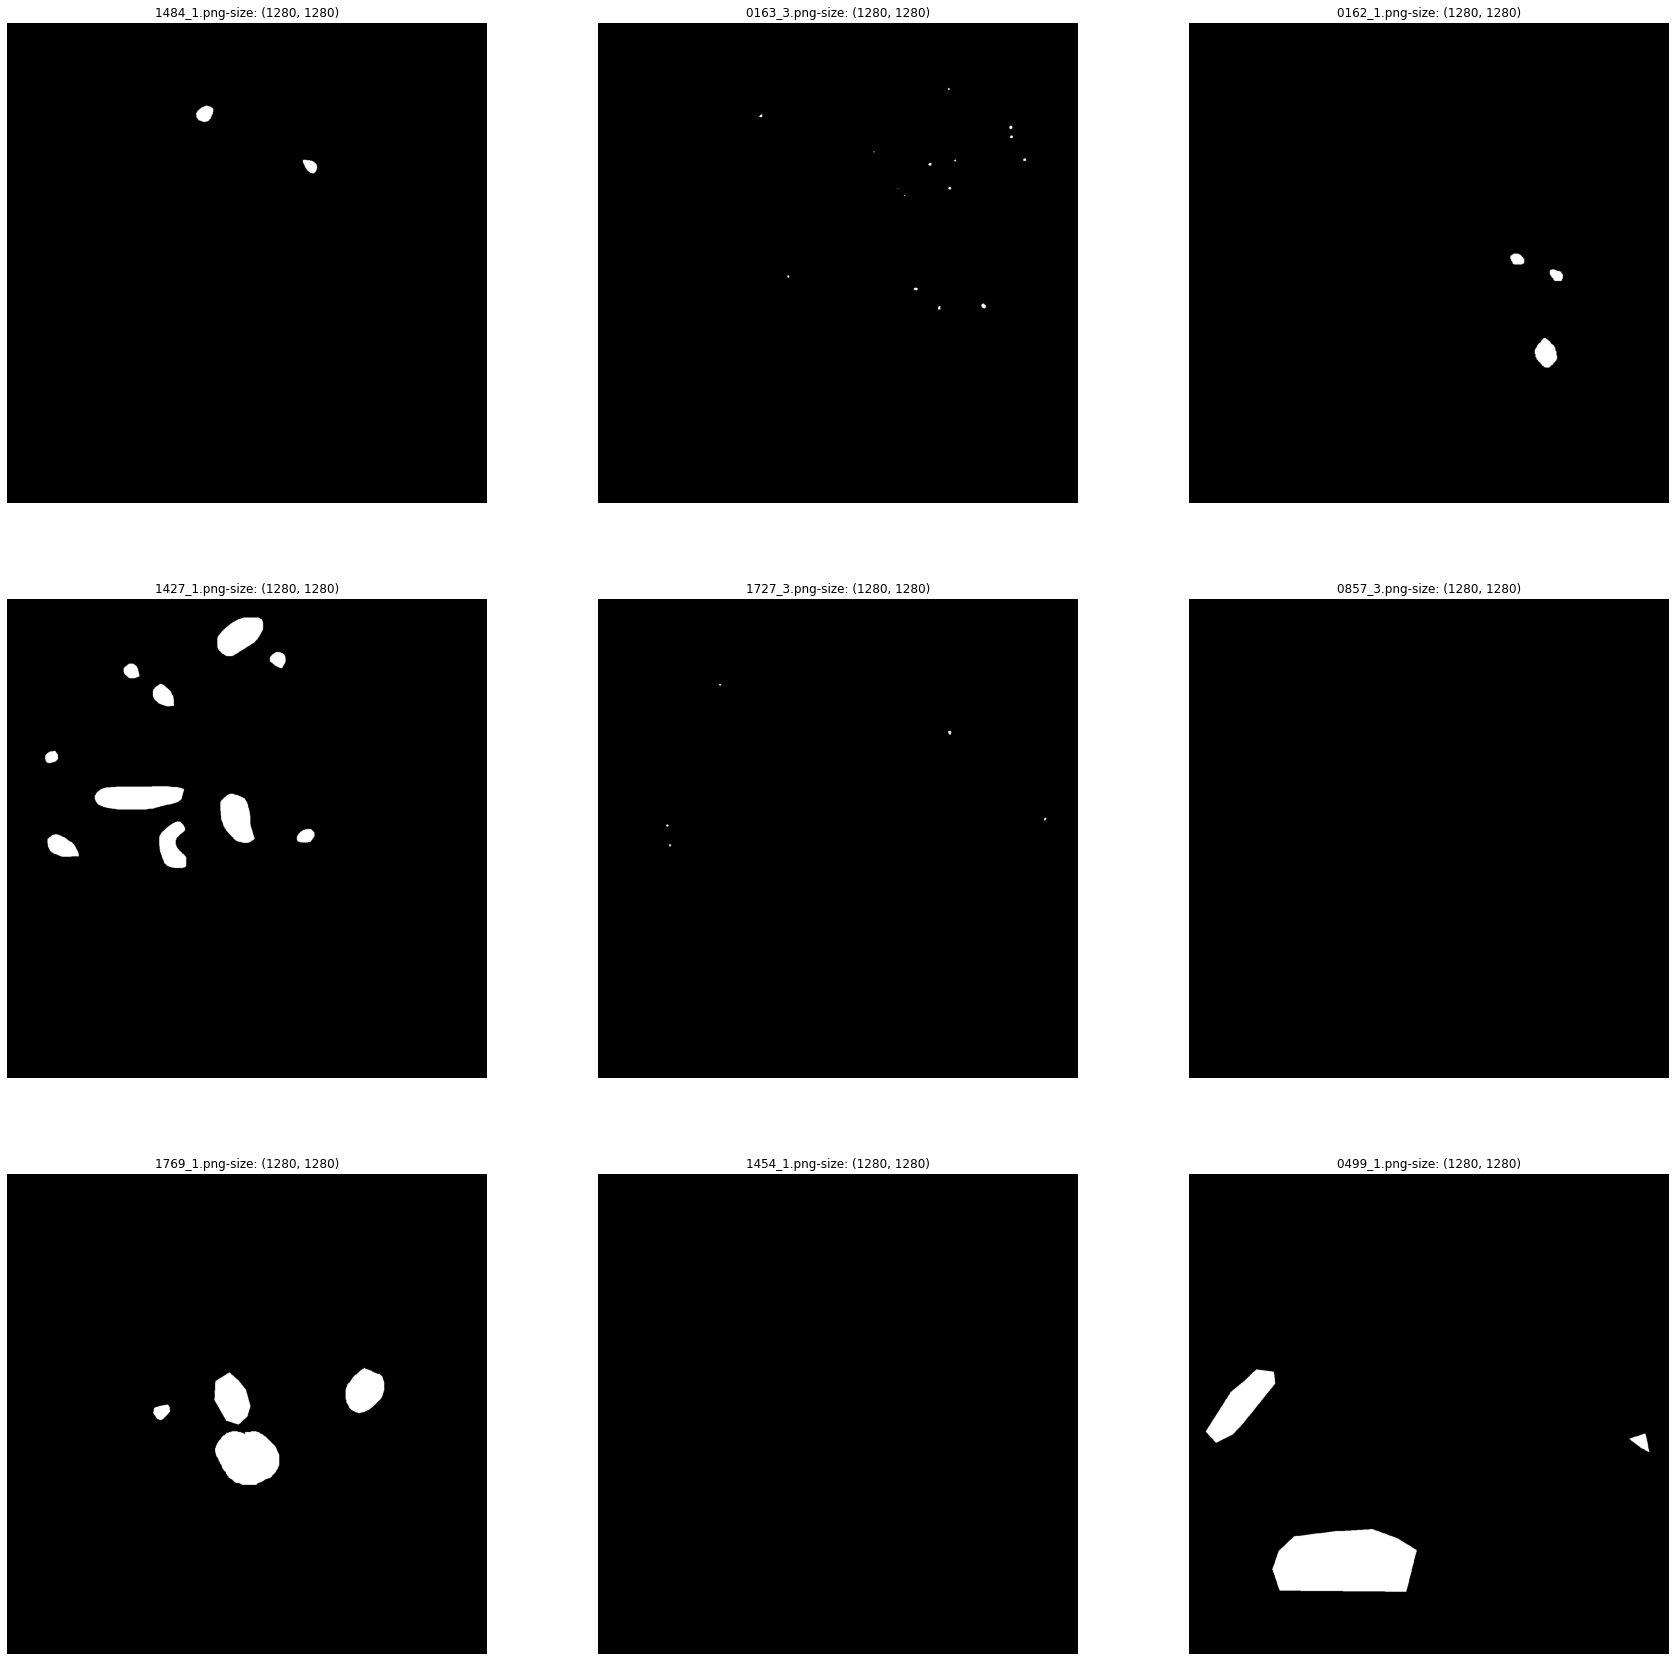

In [19]:
choose_imgs = np.random.choice(list(sub_dirs[3].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

## SE

(1280, 1280)


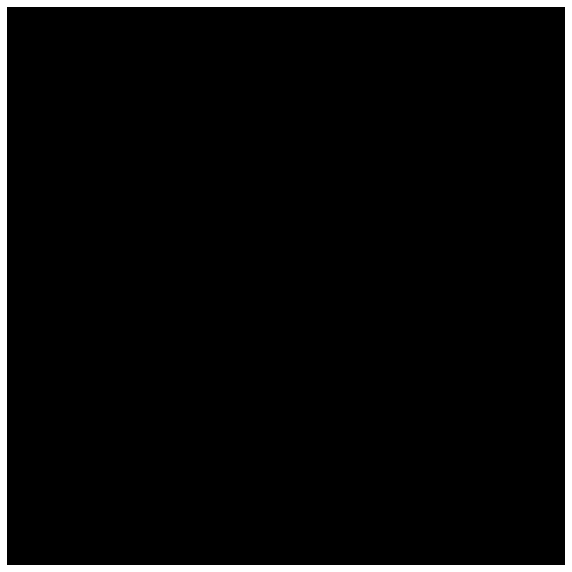

In [ ]:
img = Image.open(str(list(sub_dirs[1].glob('*.*'))[choose_img]))
print(img.size)
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.axis('off')
plt.show()

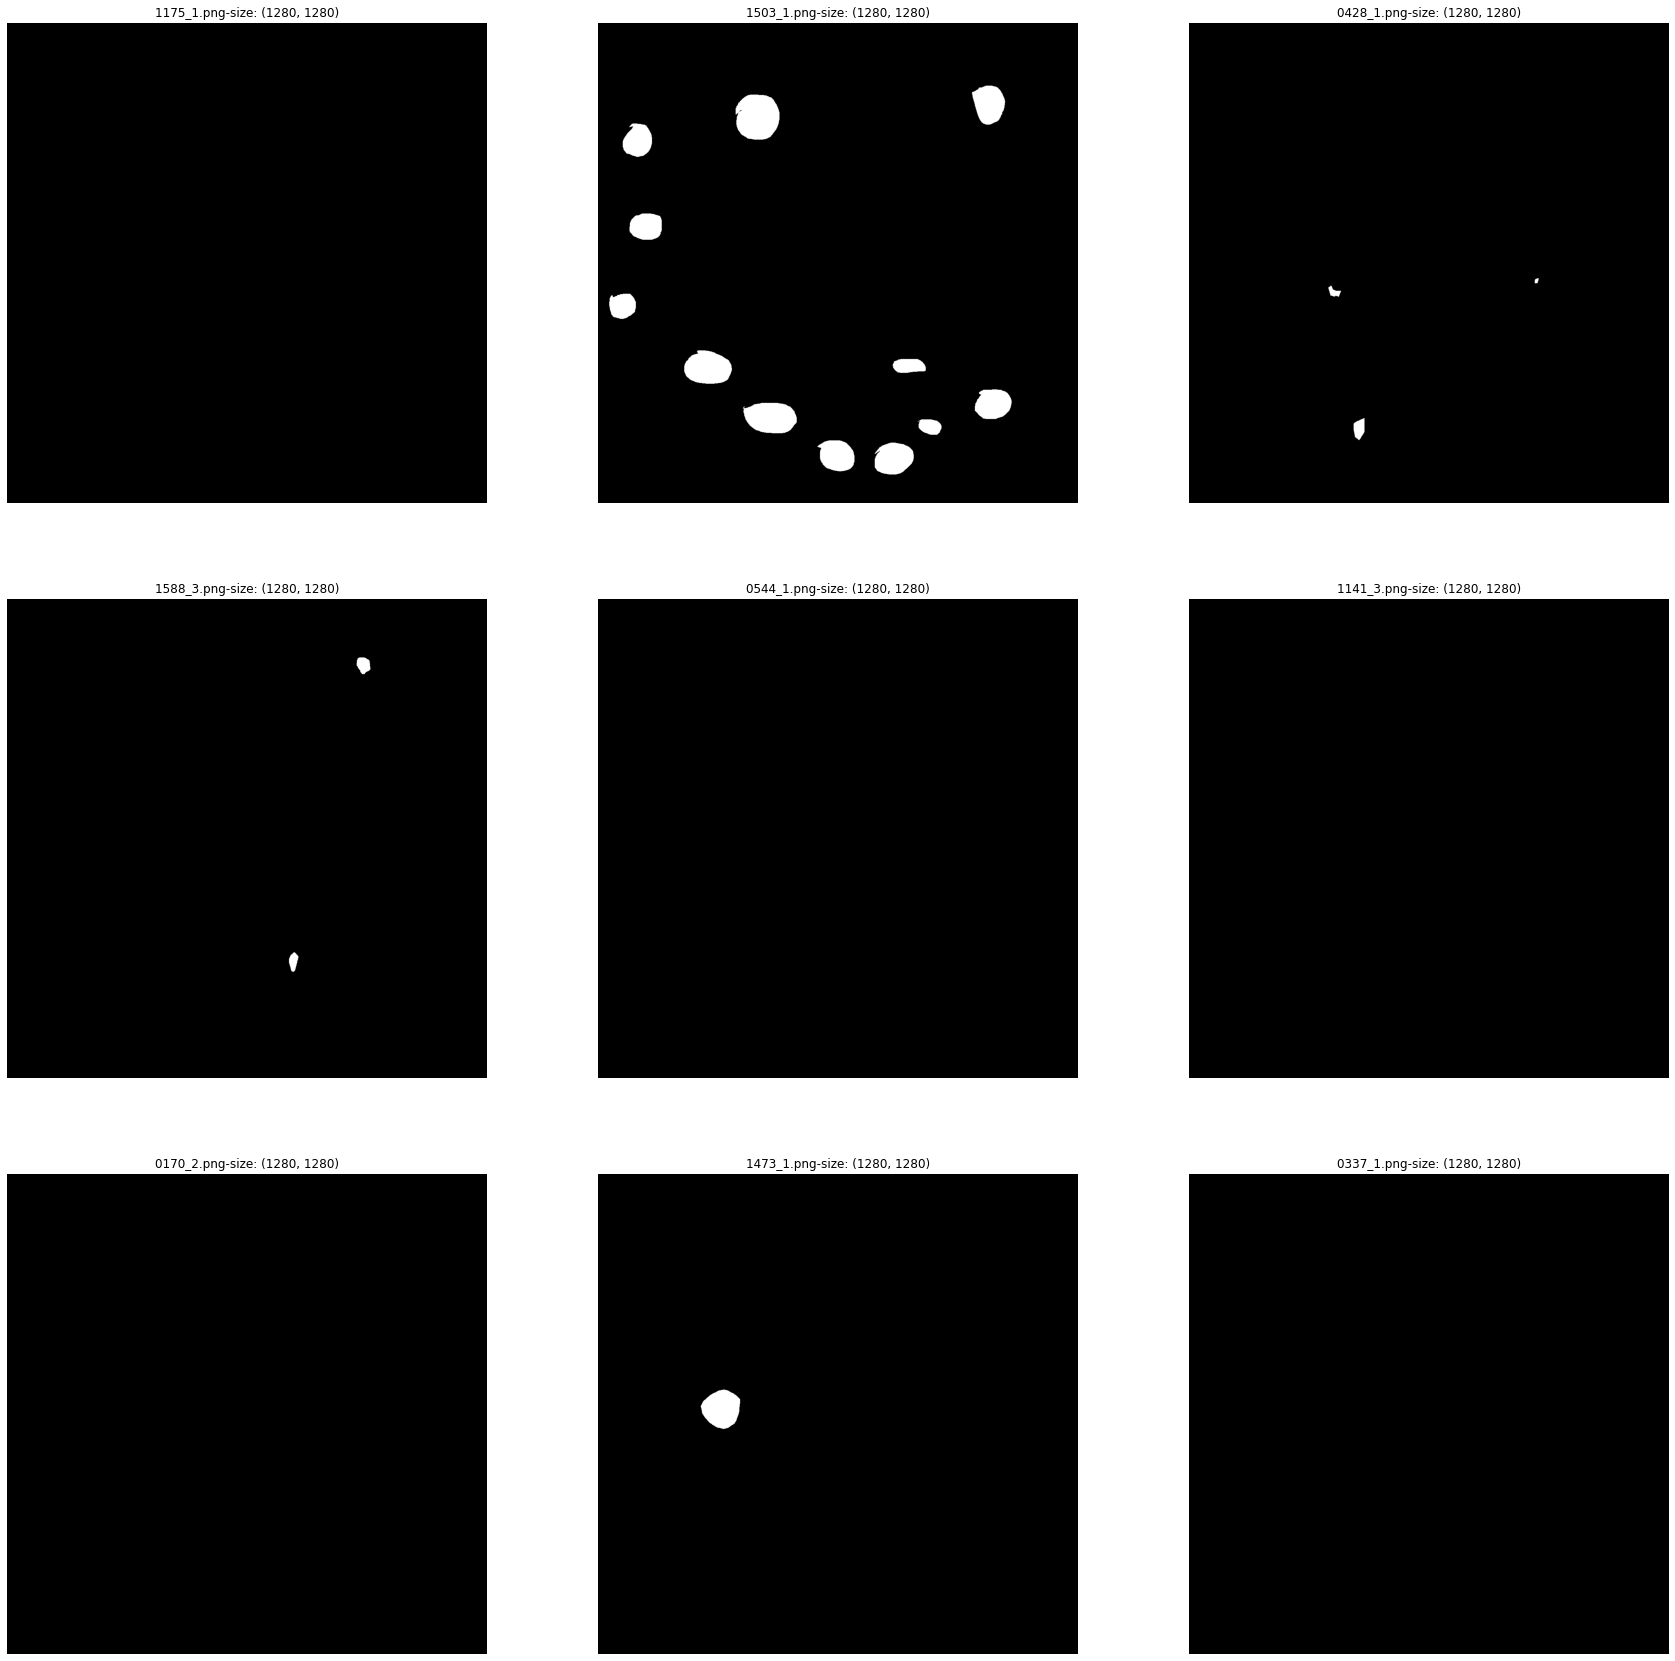

In [20]:
choose_imgs = np.random.choice(list(sub_dirs[1].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

## NEO

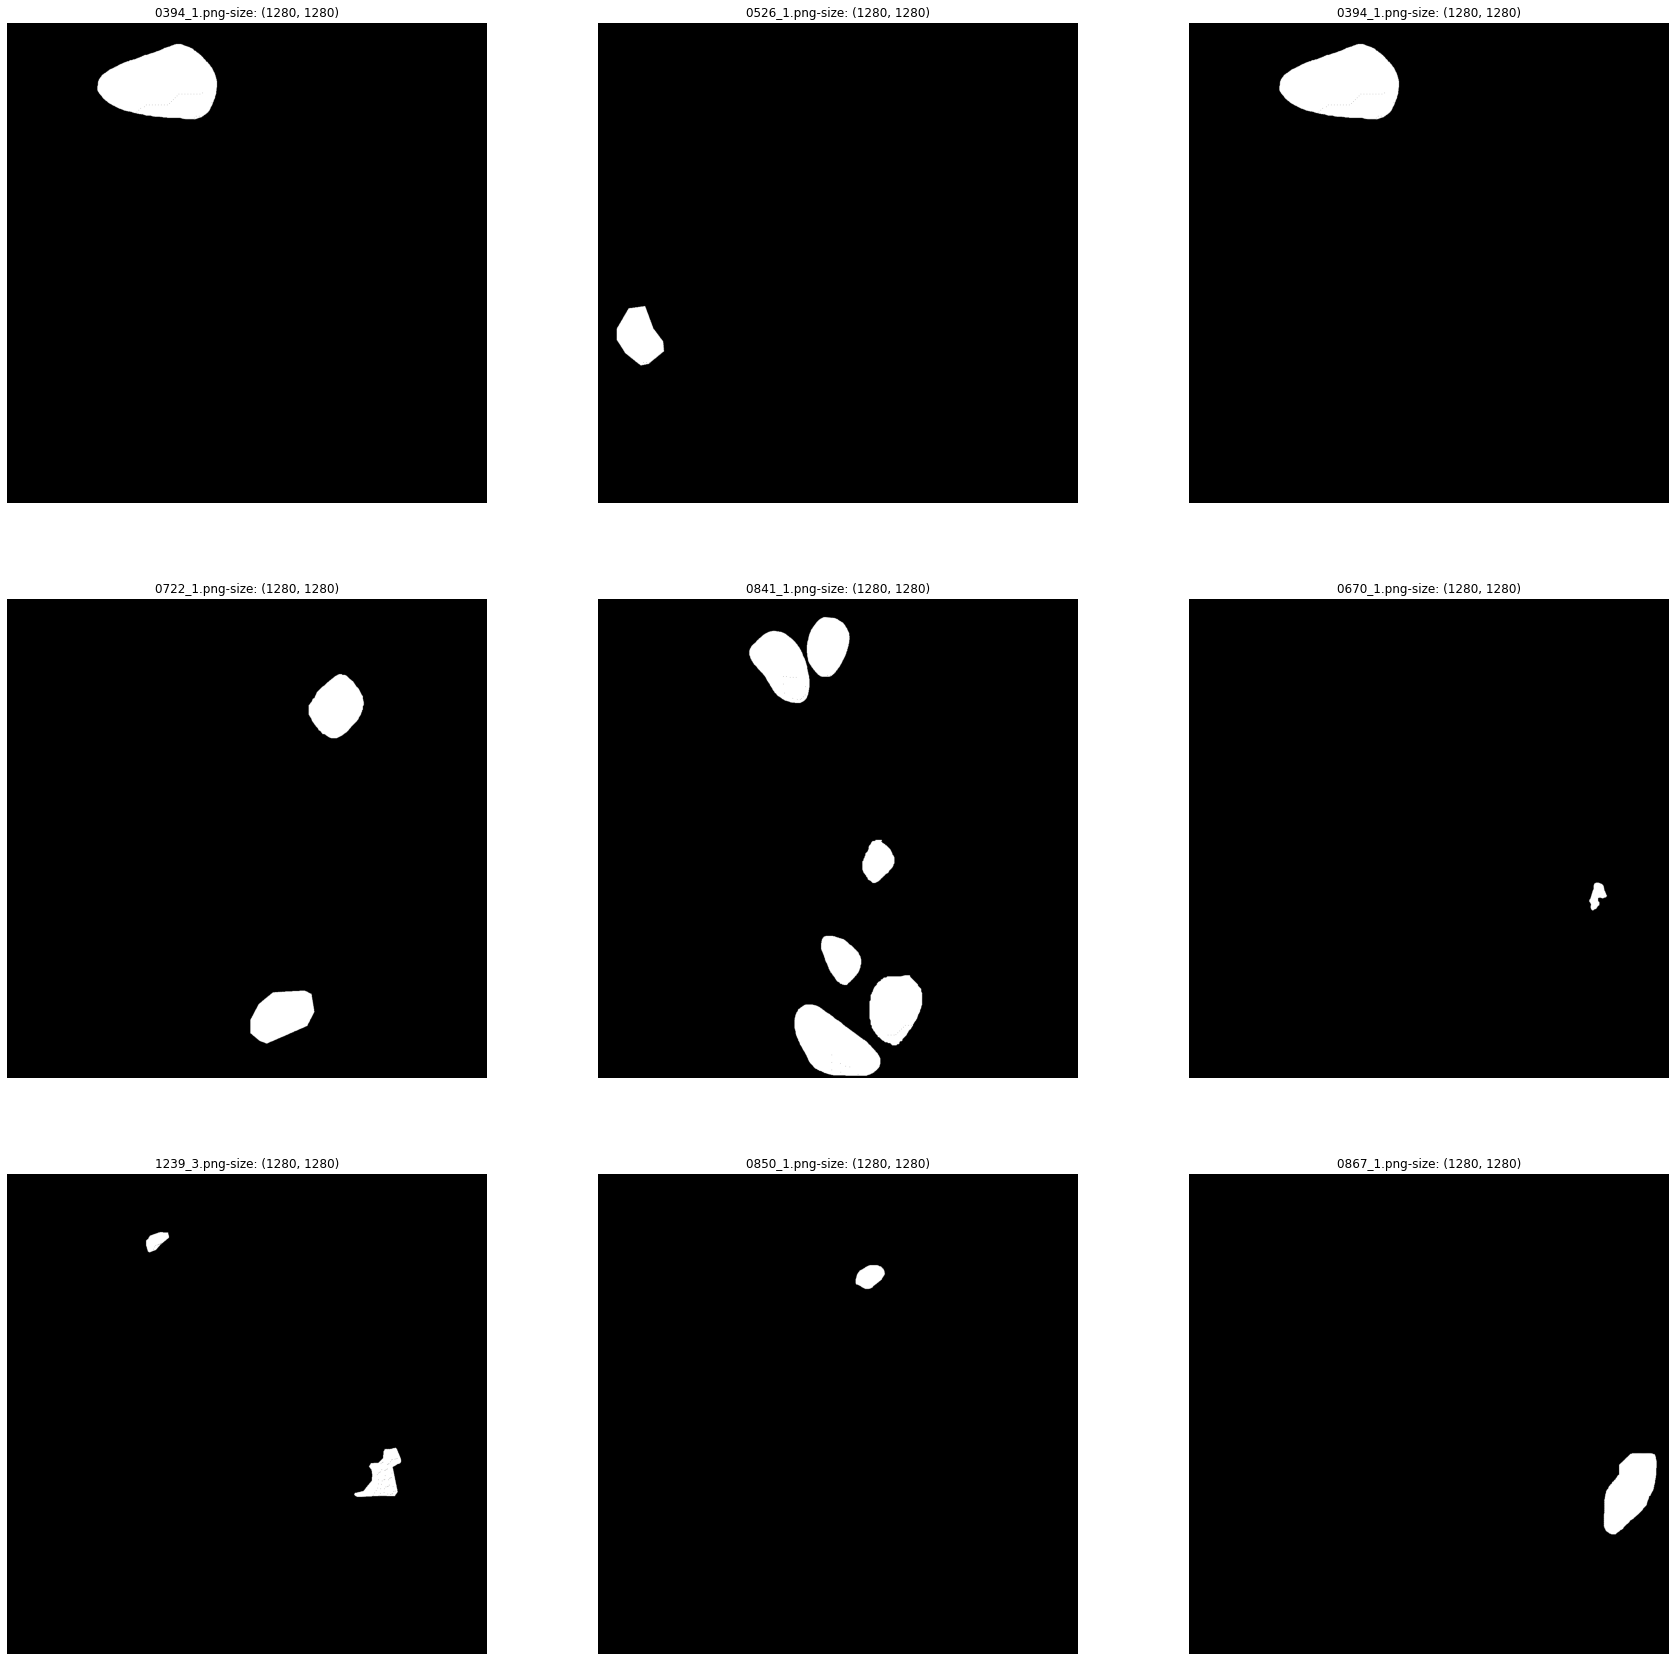

In [21]:
choose_imgs = np.random.choice(list(sub_dirs[2].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

## IRMA

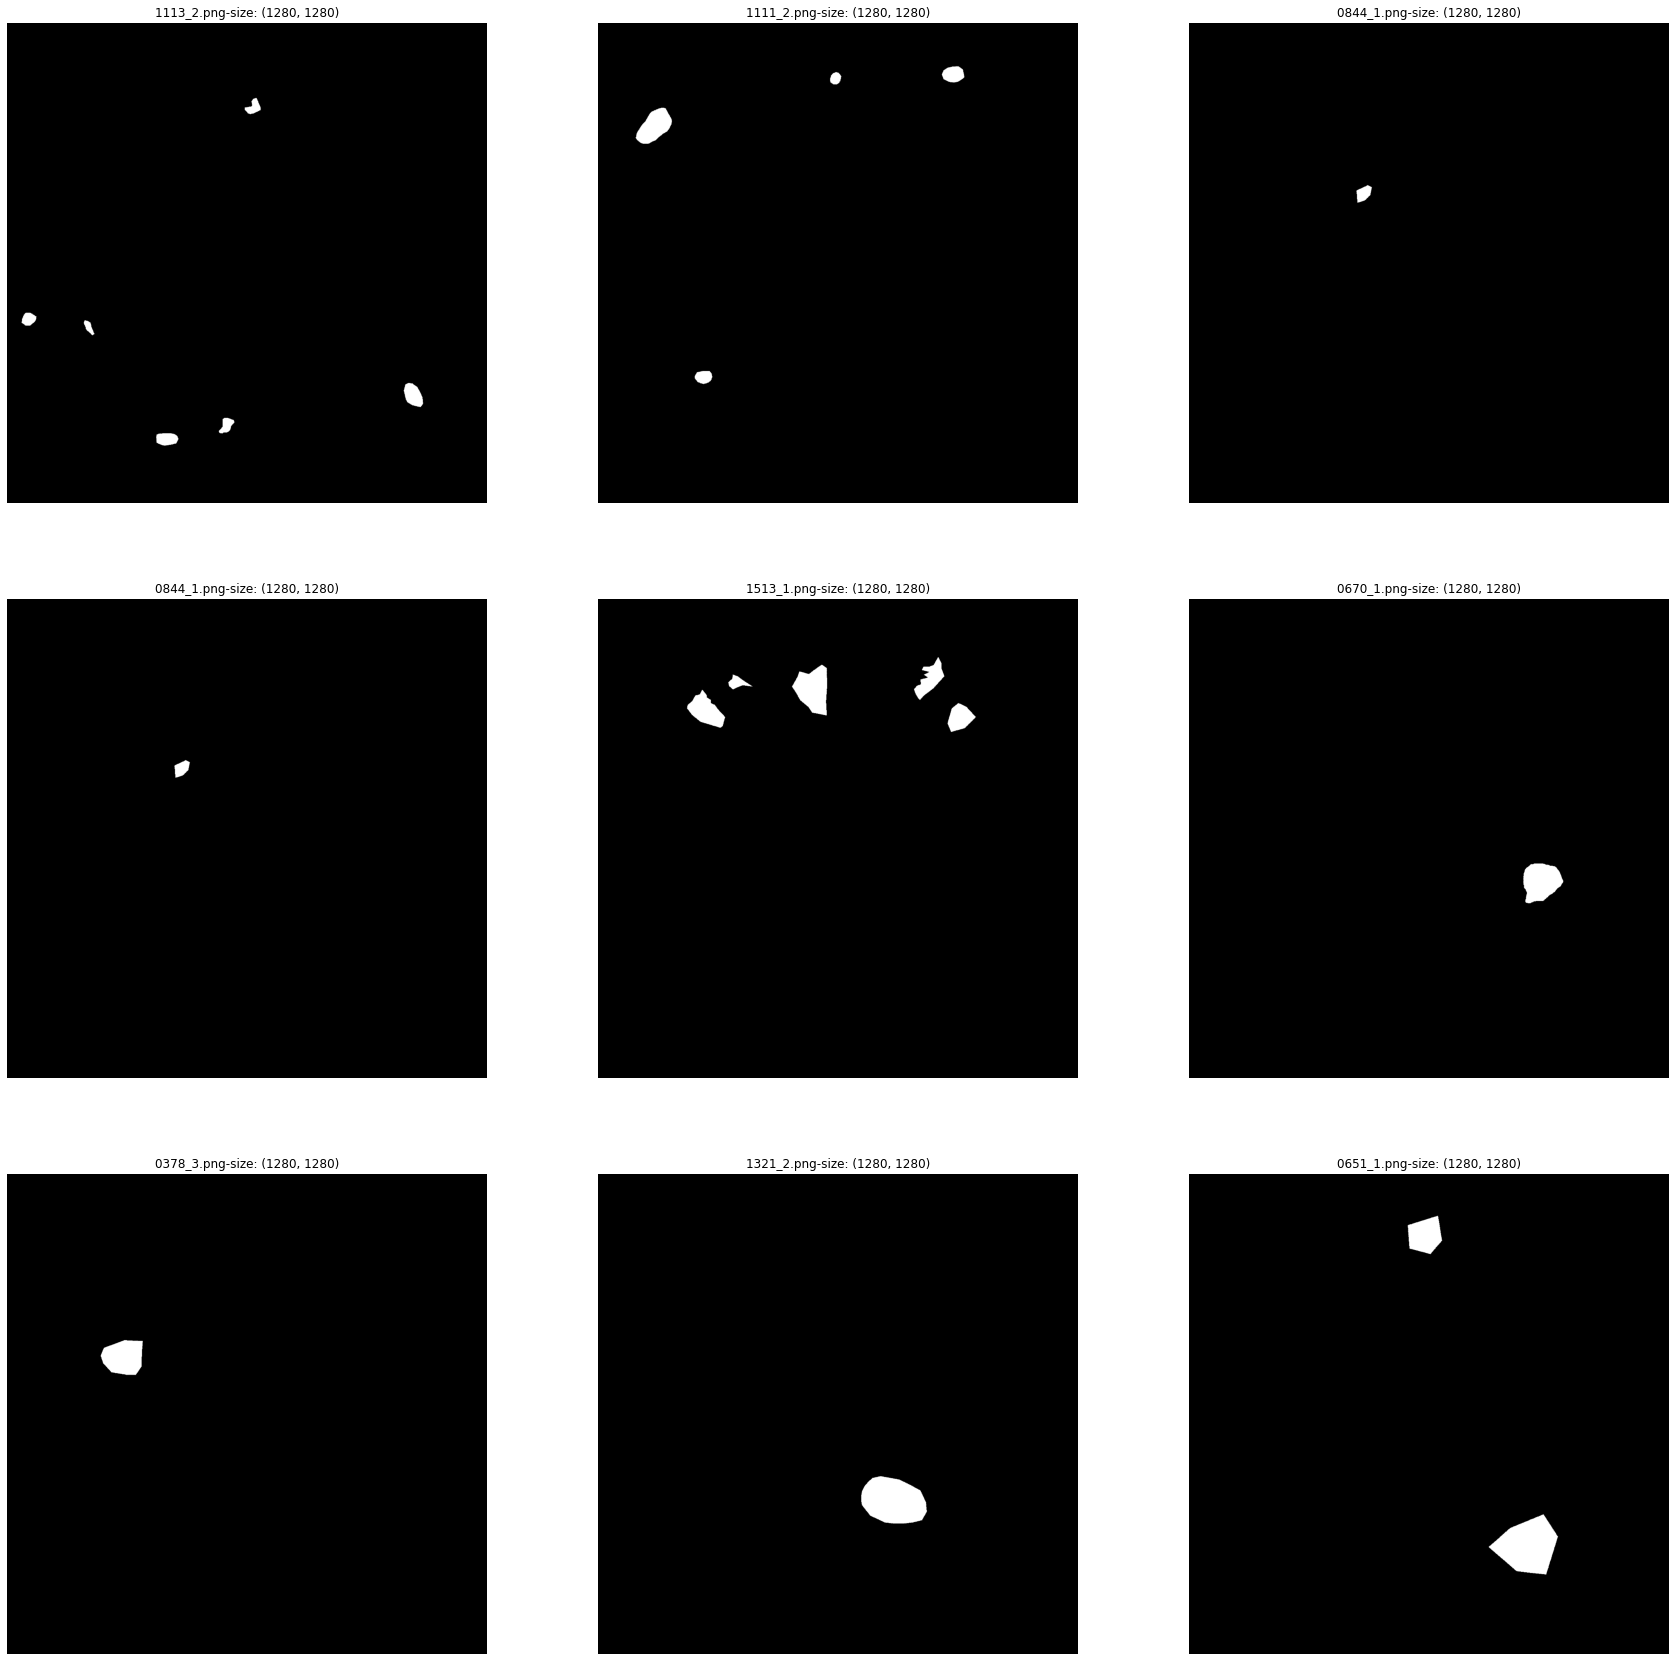

In [22]:
choose_imgs = np.random.choice(list(sub_dirs[5].glob('*.*')), 9)
plt.figure(figsize=(30, 30))
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = Image.open(choose_imgs[i])
  img = img.convert('1')
  np_img = np.asarray(img).astype('float32')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'{choose_imgs[i].name}-size: {np_img.shape}')
plt.show()

In [ ]:
lesion_dict = {}
for dir in sub_dirs:
  for img_path in list(dir.glob('*.*')):
    img = Image.open(img_path)
    img = img.convert('1')
    np_img = np.asarray(img).astype('float32')
    s_pixel = np.sum(np_img)
    if s_pixel > 0:
      if lesion_dict.get(dir.name, None) is None:
        lesion_dict[dir.name] = 1
      else:
        lesion_dict[dir.name] += 1

print(lesion_dict)

In [28]:
lesion_dict

{'HardExudate_Masks': 1279,
 'Hemohedge_Masks': 1456,
 'IRMA_Masks': 159,
 'Microaneurysms_Masks': 1424,
 'Neovascularization_Masks': 49,
 'Original_Images': 1842,
 'SoftExudate_Masks': 627}

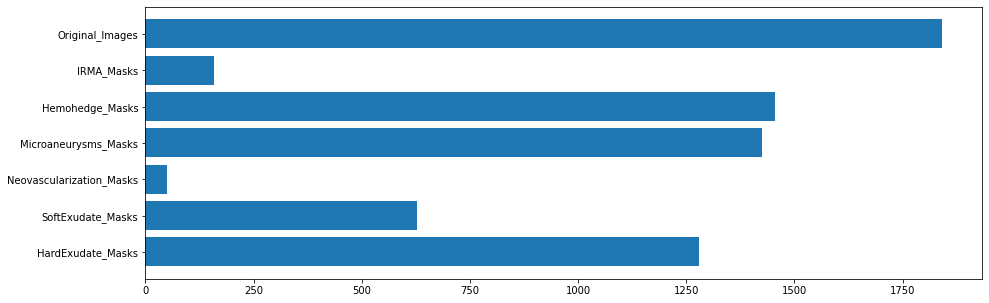

In [35]:
names = list(lesion_dict.keys())
values = list(lesion_dict.values())

plt.figure(figsize=(15, 5))
plt.barh(range(len(lesion_dict)), values, tick_label=names, )
plt.show()

## Try Ben Transform

In [25]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def load_ben_color(image, sigmaX=10, img_size: Tuple[int] = (256, 256) ):
    image = cv2.resize(image, (img_size[0], img_size[1]))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

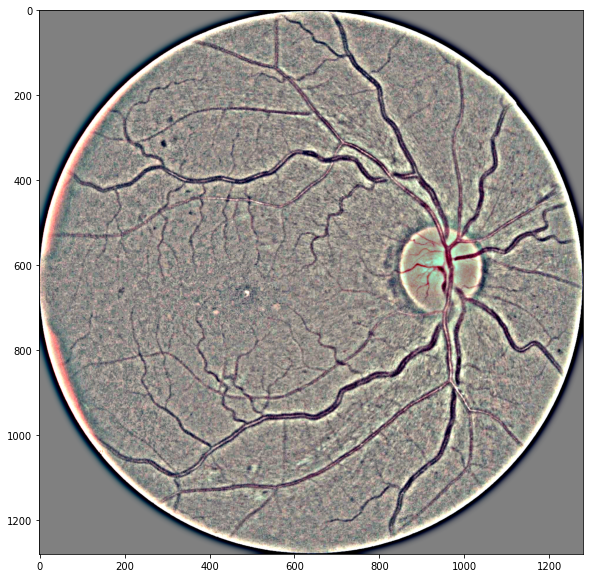

In [47]:
np_origin = np.asarray(origin_img)
origin_ben_img = load_ben_color(np_origin, sigmaX=10, img_size=origin_img.size)

plt.figure(figsize=(10, 10))
plt.imshow(origin_ben_img)
plt.show()

In [51]:
plt.figure(figsize=(30, 20))
i = 0
for sigmax in [5, 10, 15, 20, 25, 30]:
  plt.subplot(2, 3, i + 1)
  ben_img = load_ben_color(np_origin, sigmaX=sigmax, img_size=origin_img.size)
  plt.imshow(ben_img)
  plt.title(f'Sigma: {sigmax}')
  plt.axis('off')
  i += 1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Further Explore

In [12]:
#Credit: https://stackoverflow.com/questions/57576686/how-to-overlay-segmented-image-on-top-of-main-image-in-python
from PIL import Image, ImageFilter
import numpy as np

def drawContour(m,s,RGB):
    """Draw edges of contour 'c' from segmented image 's' onto 'm' in colour 'RGB'"""
    # Fill contour "c" with white, make all else black
    thisContour = s.point(lambda p:p==255)
    # DEBUG: thisContour.save(f"interim{c}.png")

    # Find edges of this contour and make into Numpy array
    thisEdges   = thisContour.filter(ImageFilter.FIND_EDGES)
    thisEdgesN  = np.array(thisEdges)

    # Paint locations of found edges in color "RGB" onto "main"
    m[np.nonzero(thisEdgesN)] = RGB
    return m

In [18]:
ex_mask = list(sub_dirs[0].glob('*.*'))[900]
origin_img = list(sub_dirs[6].glob('*.*'))[900].parent / ex_mask.name

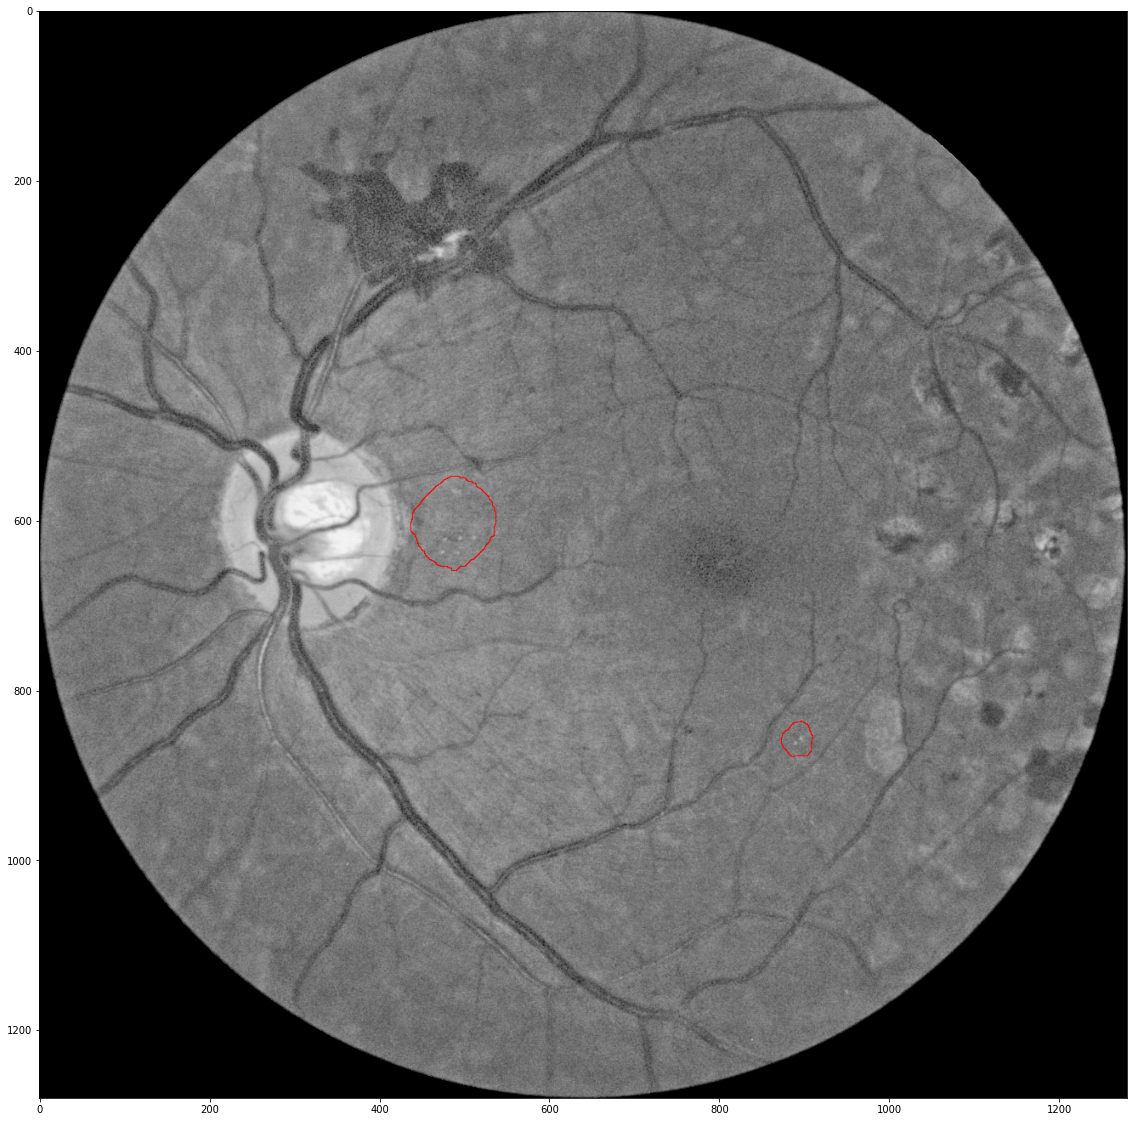

In [20]:
# Load segmented image as greyscale
seg = Image.open(ex_mask).convert('L')

# Load main image - desaturate and revert to RGB so we can draw on it in colour
main = Image.open(origin_img).convert('L').convert('RGB')
np_main = np.array(main)

mainN = drawContour(np_main,seg,(255,0,0))   # draw contour 1 in red

plt.figure(figsize=(20, 20))
plt.imshow(mainN)
plt.show()

In [31]:
def watch_overlay(gt_path: List[Path]):
  
  pass


### Overlay EX on IMG

In [32]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…